# **Project-3**

***Project Title:*** Customer Segmentation

***Project Description:*** In this project, you will build a machine learning model to segment customers based on their demographics and spending behavior. The data set includes information on customers' age, gender, annual income, and spending score (a metric assigned by the mall based on how much customers spend and how often they visit).

***Dataset Details:*** The data set contains 200 records of customers.

***Datasets Location:*** Canvas -> Modules -> Week 13 -> Dataset -> **"customers.csv"**.

***Tasks:***

1) *Data Exploration and Preprocessing:* You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.

2) *Model Building:* You will train and evaluate several unsupervised clustering models on the preprocessed data set, including k-means clustering and DBSCAN.

3) *Model Evaluation:* You will evaluate the clustering results using silhouette and inertia scores. You will also analyze the resulting customer segments and interpret their characteristics.

4) *Deployment:* Once you have identified the customer segments, you can use them to personalize marketing campaigns, improve customer retention, and optimize product recommendations.

This project will give you hands-on experience with unsupervised clustering, data preprocessing, and model evaluation. It also has real-world applications in marketing and e-commerce, where customer segmentation can help businesses tailor their offerings to different customer groups.


In [2]:
%pip install matplotlib seaborn scikit-learn IPython numpy

Note: you may need to restart the kernel to use updated packages.


# **Data Exploration and Preprocessing**
*You will explore the data set, handle missing values, perform feature engineering, and preprocess the data to get it ready for model building.*

In [3]:
import pandas as pd

df = pd.read_csv("customers.csv").drop("CustomerID", axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


Dropped the customerID column because that was just indexing of the data, customer ID can be gotten by index+1

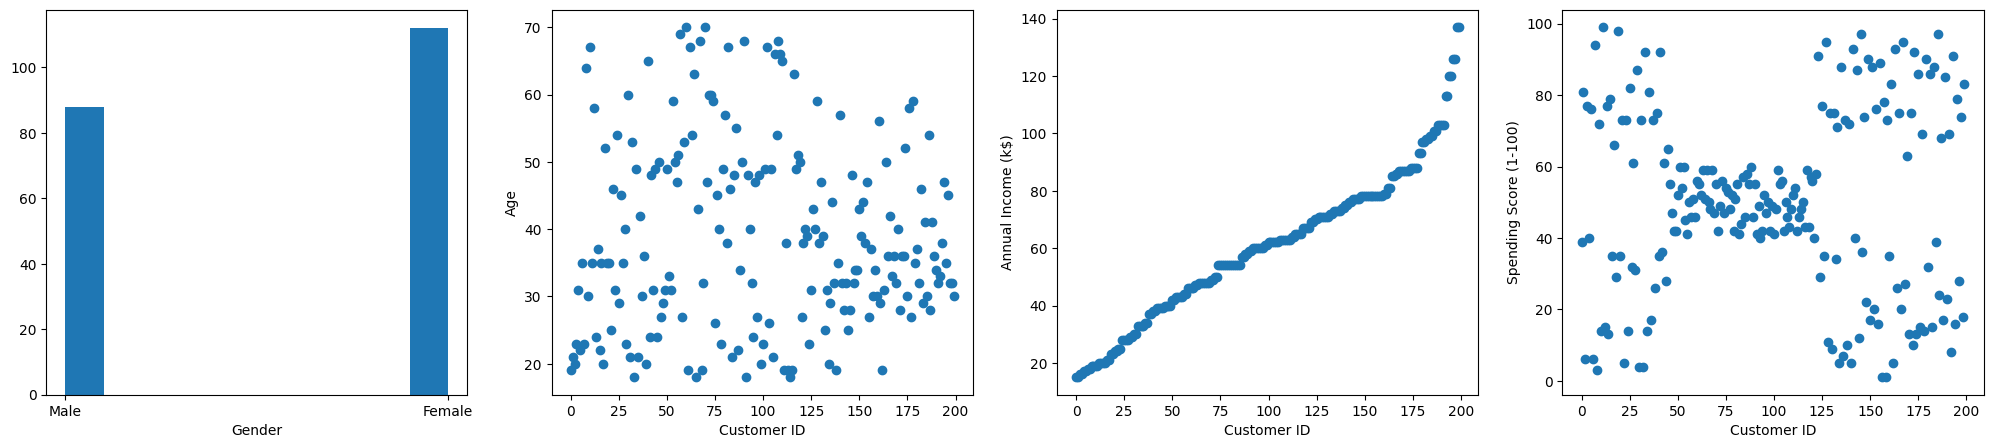

In [4]:
from matplotlib import pyplot as plt

#First Graphs to see what the data looks like 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(25,5))
axes = axes.flatten()

for (i, col) in enumerate(df.columns):
    if (col == "Gender"):
        axes[i].hist(df[col])
        axes[i].set_xlabel(col)
        continue
    axes[i].scatter(x=df.index, y=df[col])
    axes[i].set_ylabel(col)
    axes[i].set_xlabel("Customer ID")

plt.show()

The data is not really interesting for gender but for the other three, annual income and spending score are more interesting as clustering can be done on spending score and annual income seems to be an increasing scale

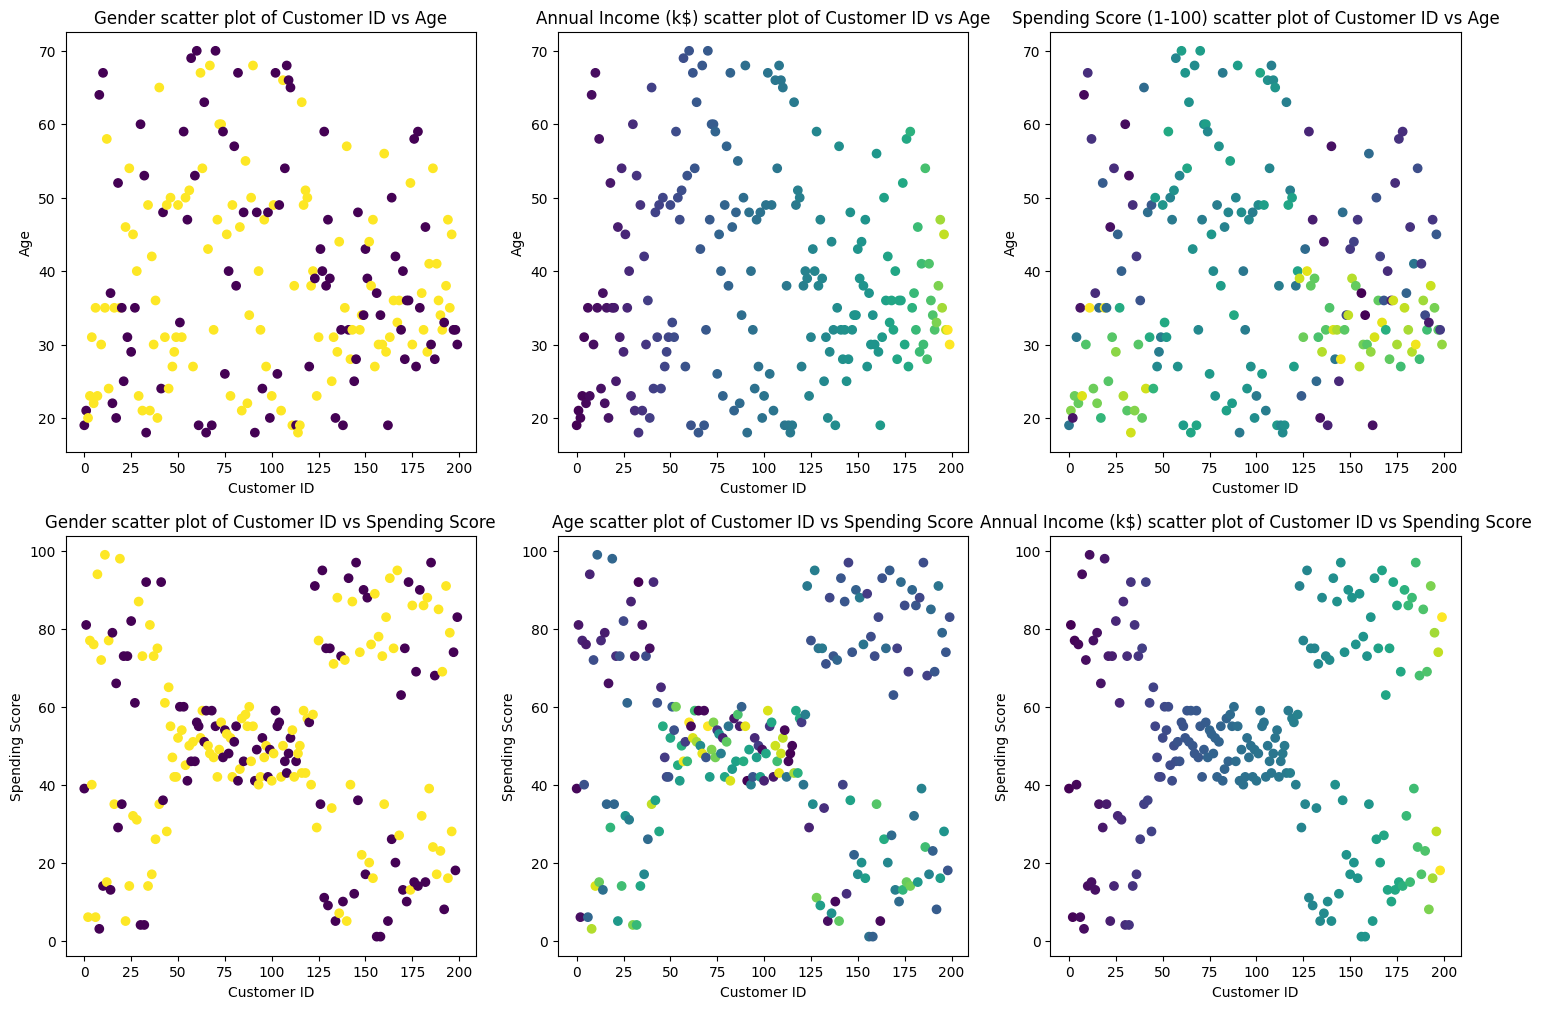

In [5]:
gender_col = df['Gender'].map({'Male': 0, 'Female': 1})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
axes = axes.flatten()

custom_col =df.columns.drop("Age")

for (i, col) in enumerate(custom_col):
    axes[i].set_title(custom_col[i] + " scatter plot of Customer ID vs Age")
    axes[i].set_ylabel("Age")
    axes[i].set_xlabel("Customer ID")
    if (col == "Gender"): 
        axes[i].scatter(x=df.index, y=df["Age"], c=gender_col)
        continue
    axes[i].scatter(x=df.index, y=df["Age"], c=df[col])
    
custom_col = df.columns.drop("Spending Score (1-100)")

for (i, col) in enumerate(custom_col):
    axes[i+3].set_title(custom_col[i] + " scatter plot of Customer ID vs Spending Score")
    axes[i+3].set_ylabel("Spending Score")
    axes[i+3].set_xlabel("Customer ID")
    if (col == "Gender"): 
        axes[i+3].scatter(x=df.index, y=df["Spending Score (1-100)"], c=gender_col)
        continue
    axes[i+3].scatter(x=df.index, y=df["Spending Score (1-100)"], c=df[col])

Text(0.5, 1.0, 'Spending Score plot of Age vs Annual Income')

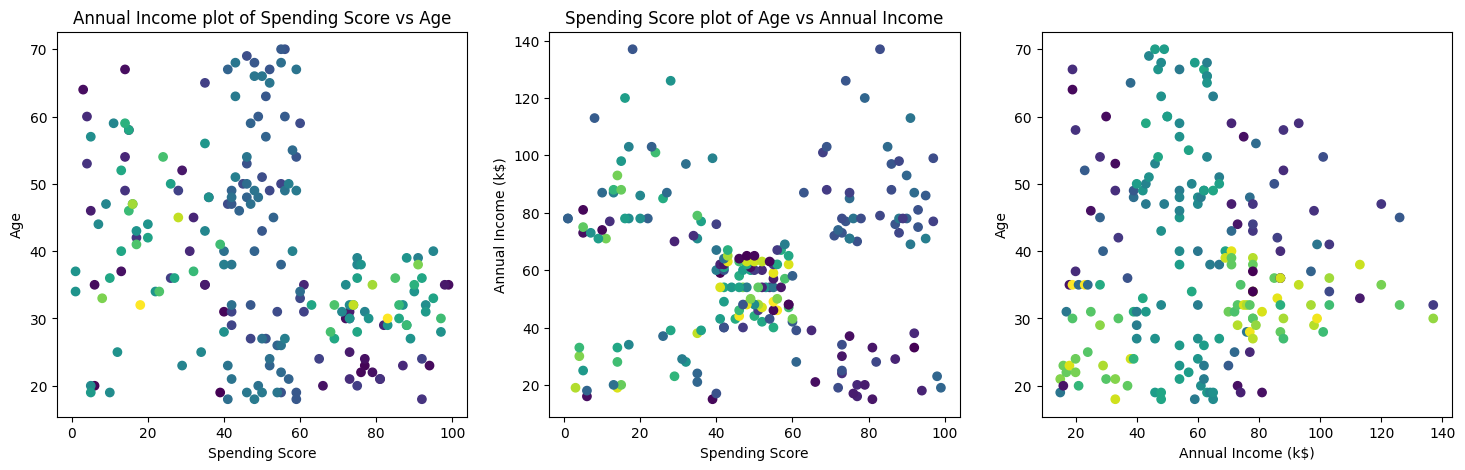

In [175]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))
axes = axes.flatten()

axes[0].scatter(x=df["Spending Score (1-100)"], y=df["Age"], c=df["Annual Income (k$)"])
axes[0].set_ylabel("Age")
axes[0].set_xlabel("Spending Score")
axes[0].set_title("Annual Income plot of Spending Score vs Age")    

axes[1].scatter(x=df["Spending Score (1-100)"], y=df["Annual Income (k$)"], c=df["Age"])
axes[1].set_ylabel("Annual Income (k$)")
axes[1].set_xlabel("Spending Score")
axes[1].set_title("Age plot of Spending Score vs Annual Income")

axes[2].scatter(df["Annual Income (k$)"], df["Age"], c=df["Spending Score (1-100)"] )
axes[2].set_ylabel("Age")
axes[2].set_xlabel("Annual Income (k$)")
axes[1].set_title("Spending Score plot of Age vs Annual Income")


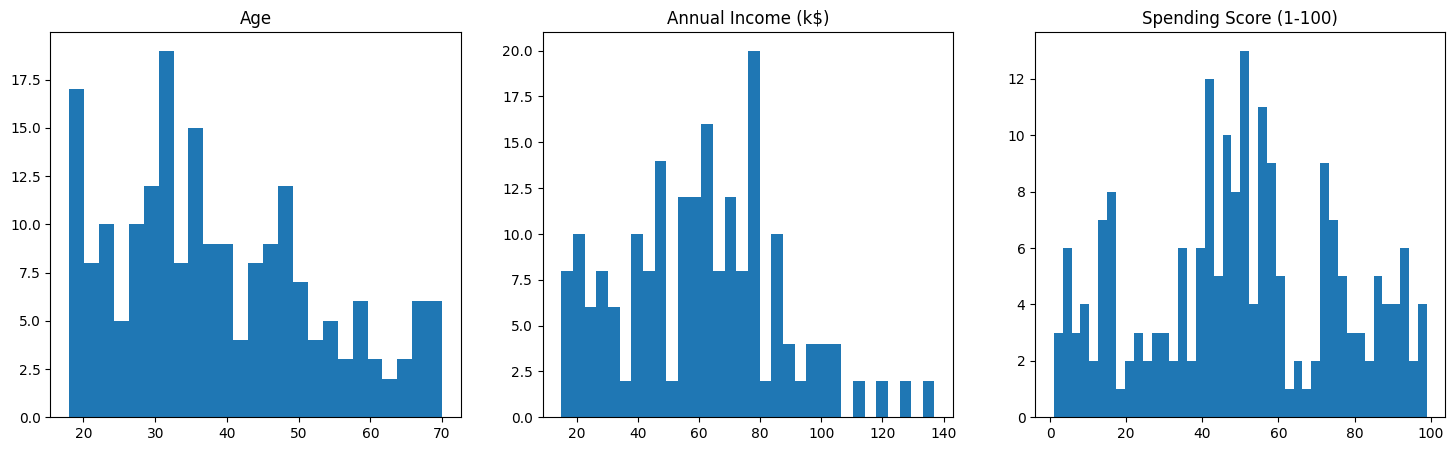

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for (i, col) in enumerate(df.columns.drop("Gender")):
    unique = len(df[col].unique())
    axes[i].set_title(col)
    axes[i].hist(df[col], bins=unique//2)


## Preprocessing

In [364]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

m_df = df.copy()

def weight_col(X):
    X_copy = X.copy()
    X_copy *= 0
    return X_copy


standard_pp = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('standard', StandardScaler()),
])

categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='null')),
    ('categorical', OrdinalEncoder()),
    ('weighter', FunctionTransformer(weight_col))
])

preprocessor = ColumnTransformer([
    ('cateforical', categorical, ["Gender"]), #Not taking this into factor because the data shouldnt be gendered
    ('standard', standard_pp, ["Spending Score (1-100)", "Annual Income (k$)", "Age"]),
])

pipe = Pipeline([
    ('column_transformer', preprocessor),
    ('pca', PCA(n_components=2)),
])

pipe

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('cateforical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='null',
                                                                                 strategy='constant')),
                                                                  ('categorical',
                                                                   OrdinalEncoder()),
                                                                  ('weighter',
                                                                   FunctionTransformer(func=<function weight_col at 0x7f4f548e6340>))]),
                                                  ['Gender']),
                                                 ('standard',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['Spending Score (1-100)',
                                                   'Annual Income (k$)',
                                                   'Age'])])),
                ('pca', PCA(n_components=2))])

In [365]:
pca_df = pd.DataFrame(pipe.fit_transform(m_df))
m_df = pd.DataFrame(preprocessor.fit_transform(m_df), columns=m_df.columns)

In [366]:
pca_df.describe()

,0,1
count,2.000000e+02,2.000000e+02
mean,8.881784e-18,1.421085e-16
std,1.155274e+00,1.002134e+00
min,-2.152445e+00,-1.820747e+00
25%,-1.082904e+00,-7.426587e-01
50%,1.854240e-01,2.418871e-02
75%,9.346571e-01,6.155439e-01
max,2.645178e+00,2.946665e+00


In [367]:
m_df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.0,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.0,-1.465494e-16,-2.131628e-16,-1.021405e-16
std,0.0,1.002509e+00,1.002509e+00,1.002509e+00
min,0.0,-1.910021e+00,-1.738999e+00,-1.496335e+00
25%,0.0,-5.997931e-01,-7.275093e-01,-7.248436e-01
50%,0.0,-7.764312e-03,3.587926e-02,-2.045351e-01
75%,0.0,8.851316e-01,6.656748e-01,7.284319e-01
max,0.0,1.894492e+00,2.917671e+00,2.235532e+00


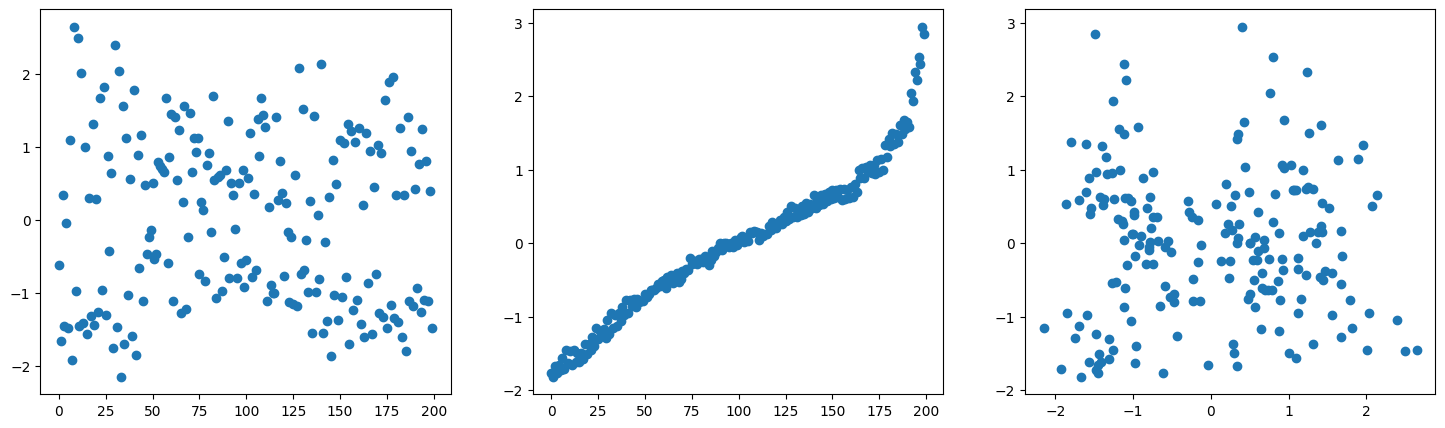

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for (i, col) in enumerate(pca_df.columns):
    axes[i].scatter(pca_df.index, pca_df[col])
    
axes[2].scatter(pca_df[0], pca_df[1])

Removing gender allows for better clustering with income and spending score to be better defined

# **Model Building** 
*You will train and evaluate several unsupervised clustering models on the preprocessed data set, including k-means clustering and DBSCAN.*

In [369]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

## KMEANS

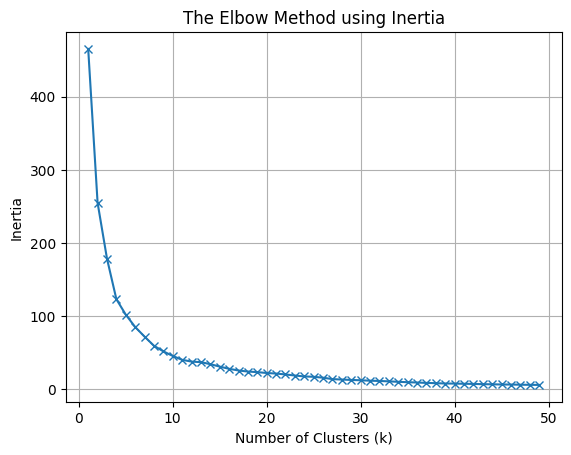

In [370]:
#Calc inertia

K = range(1,50)

def train_kmeans(k:int, X:pd.DataFrame):
    return KMeans(n_clusters=k, random_state=42).fit(X)
    

def getValues(X:pd.DataFrame):
    intertias = []
    
    for k in K:
        kmeans = train_kmeans(k , X)
        intertias.append(kmeans.inertia_)
        
    return intertias

mapping = getValues(pca_df)

plt.plot(K, mapping, 'x-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()
# About 10-15 clusters total for kmeans 

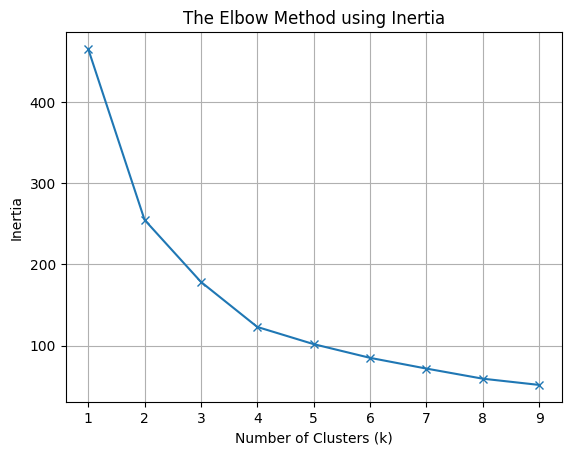

122.90870365241922


In [371]:
K = range(1, 10)

mapping = getValues(pca_df)

plt.plot(K, mapping, 'x-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.grid()
plt.show()

print(mapping[3])

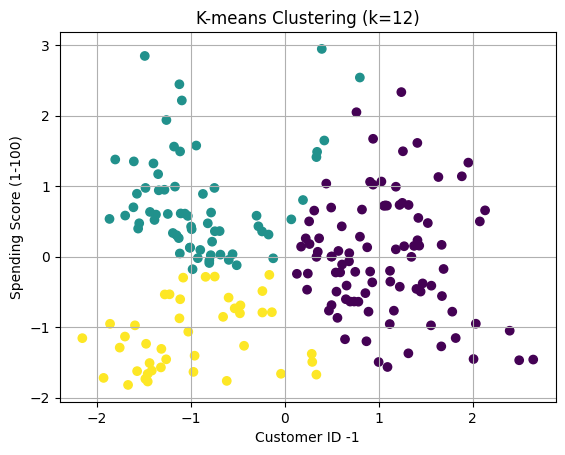

In [372]:
def plot_kmeans(k:int = 12, X:pd.DataFrame = m_df):
    kmeans = KMeans(n_clusters=k, random_state=10)
    y_kmeans = kmeans.fit_predict(X)

    plt.scatter(pca_df[0], pca_df[1], c=y_kmeans, cmap='viridis')
    plt.title(f'K-means Clustering (k=12)')
    plt.xlabel("Customer ID -1")
    plt.ylabel("Spending Score (1-100)")
    plt.grid()
    plt.show()
    
    return y_kmeans

kmeans = plot_kmeans(3, pca_df)

## DBSCAN

0.4223423423423423 8


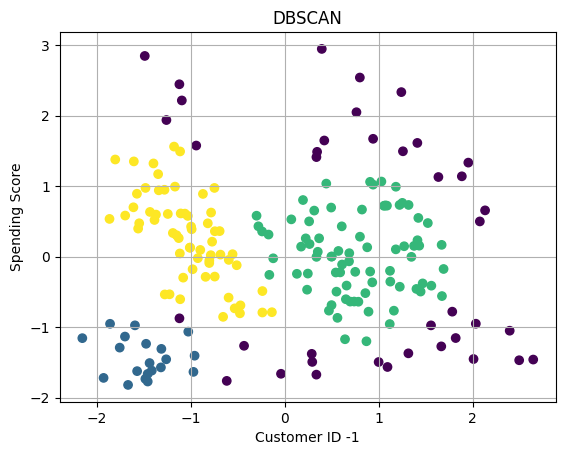

In [376]:
import numpy as np
from sklearn.metrics import silhouette_score

def find_optimal_dbscan_params(X, max_eps=1, min_samples =4, max_samples=30):
    best_silhouette = -1
    best_eps = 1
    best_min_samples = 1
    
    for eps in np.linspace(0.01, max_eps, 1000):
        for min_sample in range(min_samples, max_samples+1):
            dbscan = DBSCAN(eps=eps, min_samples=min_sample)
            labels = dbscan.fit_predict(X)
            
            # Count unique non-noise clusters
            unique_labels = set(labels)
            unique_clusters = [label for label in unique_labels if label != -1]
            # Only compute if we have at least two clusters
            if len(unique_clusters) > 1:
                try:
                    # Use adjusted parameters if needed
                    silhouette_avg = silhouette_score(X, labels)
                    if silhouette_avg > best_silhouette:
                        best_silhouette = silhouette_avg
                        best_eps = eps
                        best_min_samples = min_sample                   
                except Exception as e:
                    print(f"Error with eps={eps}, min_samples={min_samples}: {e}")
    
    return best_eps, best_min_samples



def plot_dbscan(dbscan:DBSCAN, X:pd.DataFrame = m_df, columns:int = [0,1]):
    y_dbscan = dbscan.fit_predict(X)

    plt.scatter(pca_df[0], pca_df[1], c=y_dbscan, cmap='viridis')
    plt.title(f'DBSCAN')
    plt.xlabel("Customer ID -1")
    plt.ylabel("Spending Score")
    plt.grid()
    plt.show()
    
    return y_dbscan
     
eps, samples = find_optimal_dbscan_params(pca_df, max_eps=2, max_samples=50)
print(eps,samples)
dbscan = DBSCAN(eps=eps, min_samples=samples)  
dbscan = plot_dbscan(dbscan=dbscan, X=pca_df)

## Gaussian Mixture

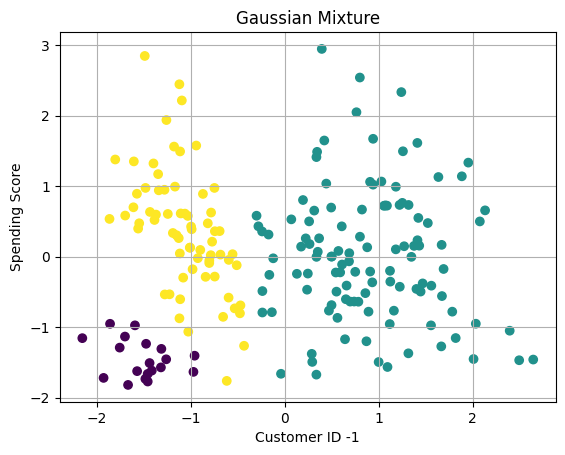

In [373]:
def find_best(X:pd.DataFrame, max_components=10):
    best_components = 1
    best_silhouette = -1
    
    for component in range (3, max_components+1):
        gm = GaussianMixture(n_components=component, random_state=10)
        labels = gm.fit_predict(X)

        try:
            # Use adjusted parameters if needed
            silhouette_avg = silhouette_score(X, labels)
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_components = component                 
        except Exception as e:
            print(f"Error with components={component}: {e}")
            
    return best_components
        

def plot_gaussian(X:pd.DataFrame, mixture: int):
    gm = GaussianMixture(n_components=mixture)
    y_gm = gm.fit_predict(X)
    
    plt.scatter(pca_df[0], pca_df[1], c=y_gm, cmap='viridis')
    plt.title(f'Gaussian Mixture')
    plt.xlabel("Customer ID -1")
    plt.ylabel("Spending Score")
    plt.grid()
    plt.show()
    return y_gm
    
gauss  = plot_gaussian(pca_df, find_best(pca_df))

# **Model Evaluation**
You will evaluate the clustering results using silhouette and inertia scores. You will also analyze the resulting customer segments and interpret their characteristics.


In [377]:
#Three models
gauss
kmeans
dbscan

#Time to find out inertia
#Inertia for Kmeans is 103.60618914360808

silhouette = pd.DataFrame( columns=["Gauss", "Kmeans", "DBSCAN"])
silhouette["Gauss"] = [silhouette_score(m_df, gauss)]
silhouette["Kmeans"] = [silhouette_score(m_df, kmeans)]
silhouette["DBSCAN"] = [silhouette_score(m_df, dbscan)]

silhouette

,Gauss,Kmeans,DBSCAN
0,0.29015,0.313305,0.232513


The best clustered data is the kmeans with the Gaussian Mixture being in close second not missing by much

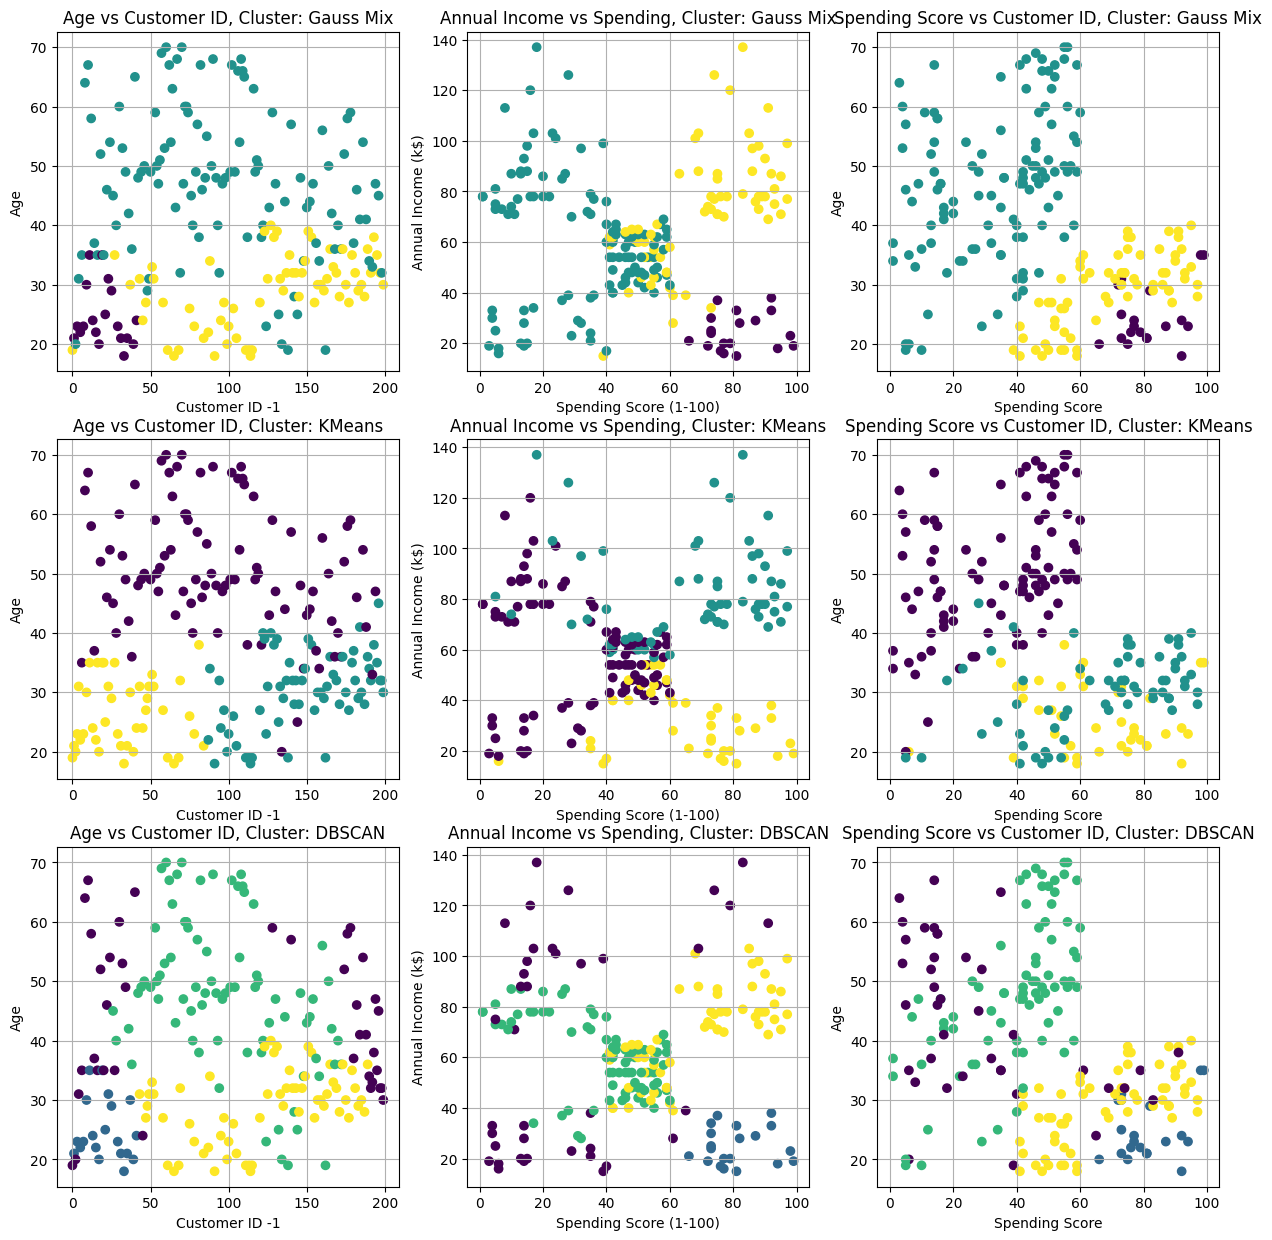

In [379]:
ncols= 3
fig, axes = plt.subplots(ncols=ncols, nrows=3, figsize=(15,15))
axes = axes.flatten()

for (i, model) in enumerate([gauss, kmeans, dbscan]):
    axes[i*ncols].scatter(df.index, df["Age"], c=model, cmap='viridis')
    axes[i*ncols].set_ylabel("Age")
    axes[i*ncols].set_xlabel("Customer ID -1")    
    axes[i*ncols].grid()
    if (i==0): axes[i*ncols].set_title(f"Age vs Customer ID, Cluster: Gauss Mix")
    if (i==1): axes[i*ncols].set_title(f"Age vs Customer ID, Cluster: KMeans")
    if (i==2): axes[i*ncols].set_title(f"Age vs Customer ID, Cluster: DBSCAN")

    axes[i*ncols+2].scatter(df["Spending Score (1-100)"], df["Age"], c=model, cmap='viridis')
    axes[i*ncols+2].set_ylabel("Age")
    axes[i*ncols+2].set_xlabel("Spending Score")    
    axes[i*ncols+2].grid()
    if (i==0): axes[i*ncols+2].set_title(f"Spending Score vs Customer ID, Cluster: Gauss Mix")
    if (i==1): axes[i*ncols+2].set_title(f"Spending Score vs Customer ID, Cluster: KMeans")
    if (i==2): axes[i*ncols+2].set_title(f"Spending Score vs Customer ID, Cluster: DBSCAN")

    axes[i*ncols+1].scatter(df["Spending Score (1-100)"],df["Annual Income (k$)"], c=model, cmap='viridis')
    axes[i*ncols+1].set_ylabel("Annual Income (k$)")
    axes[i*ncols+1].set_xlabel("Spending Score (1-100)")
    axes[i*ncols+1].grid()
    if (i==0): axes[i*ncols+1].set_title(f"Annual Income vs Spending, Cluster: Gauss Mix")
    if (i==1): axes[i*ncols+1].set_title(f"Annual Income vs Spending, Cluster: KMeans")
    if (i==2): axes[i*ncols+1].set_title(f"Annual Income vs Spending, Cluster: DBSCAN")
    
    

Cells are in Age, Spending, and Income

|Model      |Purple|green-blue|Yellow|Blue|Green|
|---|---|---|---|---|---|
|Gauss Mix  | 30>, 60<, $40k> | 30<, 60>, - | 40>, 40<, $40k< |
|KMeans     | 40<, 60<, - | 40>, 40<, $60k< | 40>, 40<, $60k> | 
|DBSCAN     | Outliers |  | 40>, 40<, $40k~100k | 40>, 60<, $40k> | 40<, 60>, $85k> | 

Gauss: 
- Purple: Young people that have high spending habits but a low income
- Green-Blue: People that are over 30 with lower than 60 in the their spending habits
- Yellow: People over 40 with above average income and low spending habits

Kmeans:
- Purple: People above 40 with a spending score below 60
- Green-Blue: People below 40, spending score above 40 with an high income.
- Yellow: People below 40 with a spending score above 40 with a low income similar to Guass Purple

DBScan:
- Yellow: Younger people with a medium to high income, and an above 40 spending score
- Blue: Younger people with a low income and a higher spending score similar to Kmeans yellow and Guass purple
- Green: Predominately older people, with a medium income, and a spending score below 60

# **Deployment:** 
*Once you have identified the customer segments, you can use them to personalize marketing campaigns, improve customer retention, and optimize product recommendations.*

A major defined group is one that includes people under 40 that have a income below $40k a year and have a high spending score. With those Products that are low are better since they are going to be buying a lot of a littel items because they cannot afford to buy bigger budget items.  
Another defined group is one that includes people under 40 that have a good income and have a high spending score. Those you can have more expensive items and they will buy it since they have the means to do so without going over budget.  
The last group would be people over 40 this group is generally good about not buying too many items and have a wide range of incomes. This group would be best suited for high ticket items that will last them a while. So something like a car or something like a printer that is easier on lower income adults.